In [3]:
import numpy as np
import pandas as pd
df1 = pd.read_csv("ausbeer.csv")
df1 = df1.dropna()


df2 = pd.read_csv("elecequip.csv")
df2 = df2.dropna()

df3 = pd.read_csv("elecsales.csv")
df3 = df3.dropna()

<AxesSubplot: xlabel='Month'>

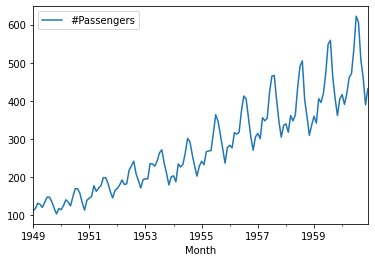

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
df=pd.read_csv("AirPassengers.csv")
#Set as Index, the month column and convert it into a Datetime Object
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
#drop null values
df.dropna(inplace=True)
df.plot()

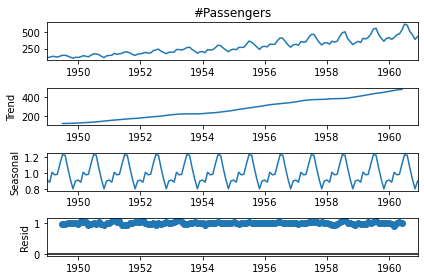

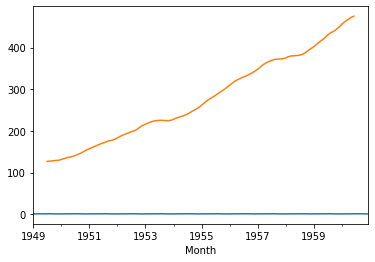

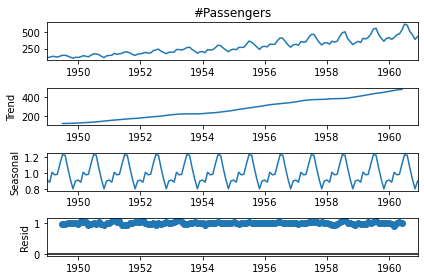

In [5]:
result=seasonal_decompose(df['#Passengers'], model='multiplicable', period=12)
#Get each component separately
result.seasonal.plot()
result.trend.plot()
# or all together
result.plot()

In [6]:
# Python program to calculate simple moving averages using pandas
import pandas as pd
arr= [1, 2, 3, 7, 9]
window_size= 3
# Convert array of integers to pandas series
numbers_series= pd.Series(arr)
# Get the window of series of observations of specified window size
windows = numbers_series.rolling(window_size)
# Create a series of moving averages of each window
moving_averages= windows.mean()
# Convert pandas series back to list
moving_averages_list= moving_averages.tolist()
# Remove null entries from the list
final_list= moving_averages_list[window_size-1:]
print(final_list)

[2.0, 4.0, 6.333333333333333]


In [7]:
import math
import datetime
import matplotlib.pyplot as plt
plt.style.use('default')
window_size= 5
# Convert array of integers to pandas series
numbers_series= pd.Series(df3["Elecsales"])
# Get the window of series of observations of specified window size
windows = numbers_series.rolling(window_size,center=True)
# Create a series of moving averages of each window
moving_averages= windows.mean()
# Convert pandas series back to list
df3['final_list'] = moving_averages

#df3.set_index("Year",inplace=True)
#df3.index=pd.to_datetime(df3.index)
#for i in math.floor(window_size/2):
#    final_list.insert(0,None)
#final_list.insert(0,None)

#df3['final_list'] = pd.DataFrame(moving_averages,columns =['final_list'])

df3.head()

,Year,Elecsales,final_list
0,1989,2354.34,NaN
1,1990,2379.71,NaN
2,1991,2318.52,2381.530
3,1992,2468.99,2424.556
4,1993,2386.09,2463.758


In [8]:
window_size=5
df3["Elecsales"] = df3['Elecsales'].to_frame()
df3['final_list']=df3['Elecsales'].rolling(window_size,center=True).mean()
df3.head()

,Year,Elecsales,final_list
0,1989,2354.34,NaN
1,1990,2379.71,NaN
2,1991,2318.52,2381.530
3,1992,2468.99,2424.556
4,1993,2386.09,2463.758


<AxesSubplot: >

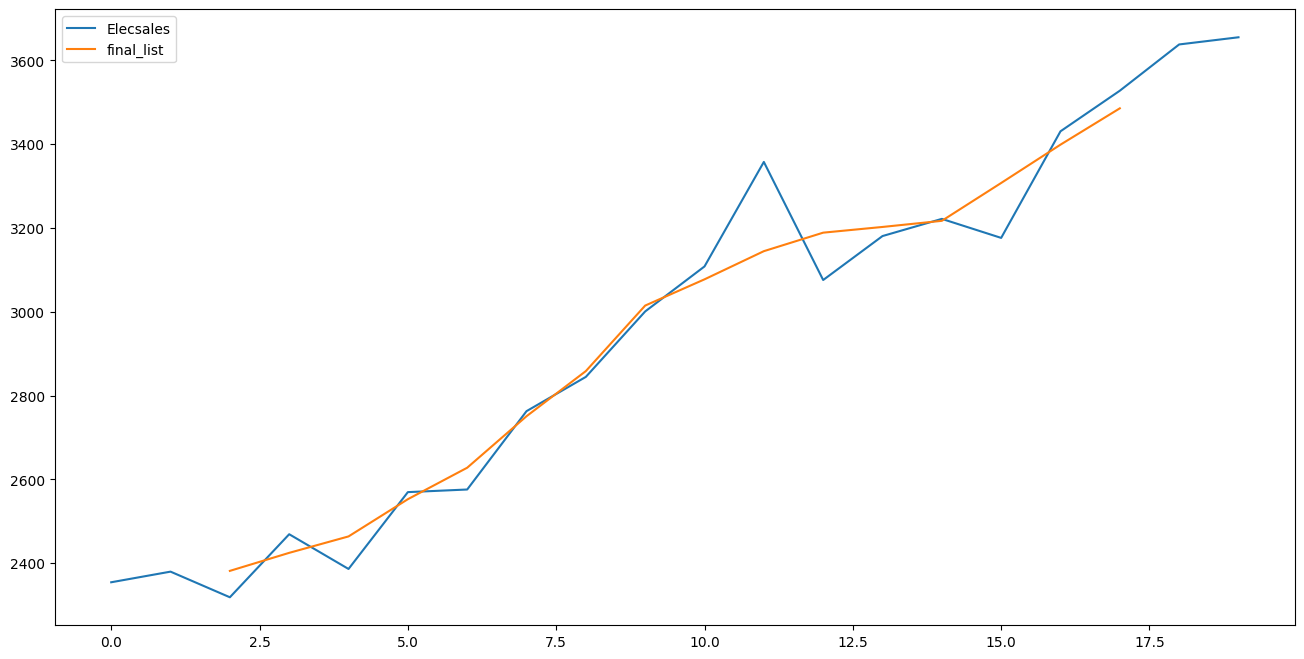

In [9]:
df3[['Elecsales', 'final_list']].plot(label='Year',
                                  figsize=(16, 8))

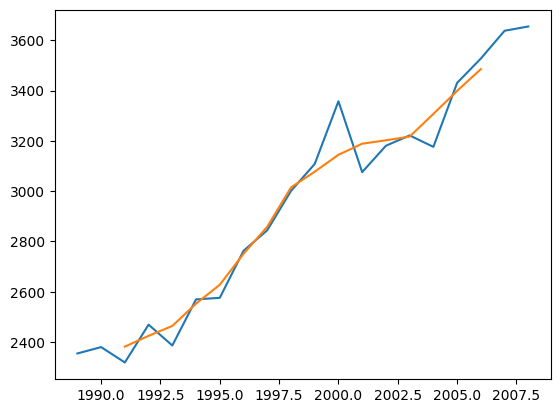

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import time
fig, ax = plt.subplots()
ax.plot(df3['Year'],df3['Elecsales'],df3['Year'],df3['final_list'])
plt.show()

In [20]:
import numpy as np
import pandas as pd
df = pd.read_csv("Libro1.csv")

df['Sales'] = df['Sales(1000s)']
df = df.drop(['Sales(1000s)'], axis =1)
window_size=4
df["Sales"] = df['Sales'].to_frame()
df['MA(4)']=df['Sales'].rolling(window_size,center=True).mean()
df.head()
window_size_2=2

df['CMA']=df['MA(4)'].rolling(window_size_2,center=True).mean()
df["CMA"] = df['CMA'].to_frame()
list1 = df["CMA"].to_list()
arr=np.array(list1)
arr=np.delete(arr,0)
df["CMA"] = pd.DataFrame(arr)
df['y/CMA'] = df['Sales']/df['CMA']

#estacionalidad

df["St"] = np.where(df.Quarter == 1,df.where(df.Quarter==1)['y/CMA'].mean(),
np.where(df.Quarter == 2,df.where(df.Quarter==2)['y/CMA'].mean(),
np.where(df.Quarter == 3,df.where(df.Quarter==3)['y/CMA'].mean(),
df.where(df.Quarter==4)['y/CMA'].mean()
)))

#observar la tendencia

df['Yt_St'] = df['Sales']/df['St']

df5 = df.groupby('Quarter')['y/CMA'].mean()


df

,Year,Quarter,Sales,MA(4),CMA,y/CMA,St,Yt_St
0,1,1,2.8,NaN,NaN,NaN,0.902801,3.101458
1,1,2,2.1,NaN,NaN,NaN,0.767568,2.735912
2,1,3,4.0,3.350,3.4750,1.151079,1.138587,3.513126
3,1,4,4.5,3.600,3.7375,1.204013,1.210084,3.718750
4,2,1,3.8,3.875,3.9750,0.955975,0.902801,4.209122
5,2,2,3.2,4.075,4.1875,0.764179,0.767568,4.169009
6,2,3,4.8,4.300,4.3250,1.109827,1.138587,4.215751
7,2,4,5.4,4.350,4.4000,1.227273,1.210084,4.462499
8,3,1,4.0,4.450,4.5375,0.881543,0.902801,4.430654
9,3,2,3.6,4.625,4.6750,0.770053,0.767568,4.690135


In [21]:
import statsmodels.api as sm 
formula_string = "Sales ~ Yt_St"
model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.535
Method:                 Least Squares   F-statistic:                     18.25
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           0.000775
Time:                        10:18:09   Log-Likelihood:                -18.490
No. Observations:                  16   AIC:                             40.98
Df Residuals:                      14   BIC:                             42.52
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8858      1.250     -0.709      0.4

c:\Users\42mar\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
df['Trend'] = model_fitted.fittedvalues
df

,Year,Quarter,Sales,MA(4),CMA,y/CMA,St,Yt_St,Trend
0,1,1,2.8,NaN,NaN,NaN,0.902801,3.101458,2.887243
1,1,2,2.1,NaN,NaN,NaN,0.767568,2.735912,2.442540
2,1,3,4.0,3.350,3.4750,1.151079,1.138587,3.513126,3.388055
3,1,4,4.5,3.600,3.7375,1.204013,1.210084,3.718750,3.638205
4,2,1,3.8,3.875,3.9750,0.955975,0.902801,4.209122,4.234764
5,2,2,3.2,4.075,4.1875,0.764179,0.767568,4.169009,4.185965
6,2,3,4.8,4.300,4.3250,1.109827,1.138587,4.215751,4.242829
7,2,4,5.4,4.350,4.4000,1.227273,1.210084,4.462499,4.543009
8,3,1,4.0,4.450,4.5375,0.881543,0.902801,4.430654,4.504268
9,3,2,3.6,4.625,4.6750,0.770053,0.767568,4.690135,4.819938


In [23]:
df['St*Trend'] = df['St']*df['Trend']
df

,Year,Quarter,Sales,MA(4),CMA,y/CMA,St,Yt_St,Trend,St*Trend
0,1,1,2.8,NaN,NaN,NaN,0.902801,3.101458,2.887243,2.606606
1,1,2,2.1,NaN,NaN,NaN,0.767568,2.735912,2.442540,1.874817
2,1,3,4.0,3.350,3.4750,1.151079,1.138587,3.513126,3.388055,3.857596
3,1,4,4.5,3.600,3.7375,1.204013,1.210084,3.718750,3.638205,4.402534
4,2,1,3.8,3.875,3.9750,0.955975,0.902801,4.209122,4.234764,3.823150
5,2,2,3.2,4.075,4.1875,0.764179,0.767568,4.169009,4.185965,3.213015
6,2,3,4.8,4.300,4.3250,1.109827,1.138587,4.215751,4.242829,4.830831
7,2,4,5.4,4.350,4.4000,1.227273,1.210084,4.462499,4.543009,5.497424
8,3,1,4.0,4.450,4.5375,0.881543,0.902801,4.430654,4.504268,4.066459
9,3,2,3.6,4.625,4.6750,0.770053,0.767568,4.690135,4.819938,3.699633


<AxesSubplot: >

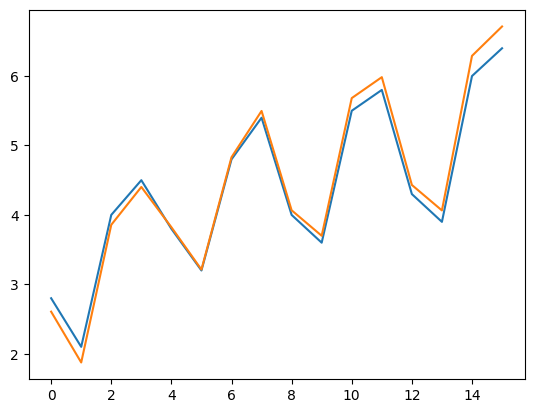

In [25]:
df['Sales'].plot()
df['St*Trend'].plot()